<a href="https://colab.research.google.com/github/Lynneice/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Lynneice_McNutt_DSPT9_DS_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [ ]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [ ]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Check for missing/null values in the three dataframes

In [ ]:
# Your Work Here
# Your Work Here
#Check for missing/null values in the three dataframes
print(cell_phones.isnull().sum())
print()
print(population.isnull().sum())
print()
print(geo_country_codes.isnull().sum())

geo                  0
time                 0
cell_phones_total    0
dtype: int64

geo                 0
time                0
population_total    0
dtype: int64

geo        0
country    0
dtype: int64


Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

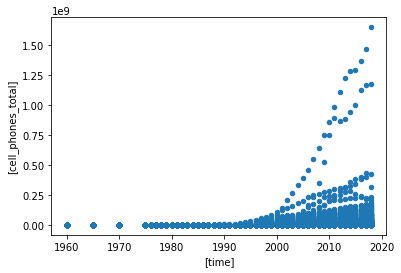

In [ ]:
# Your Work Here
import matplotlib as plt
cell_phones.plot(x=['time'], y=['cell_phones_total'], kind='scatter');

### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [ ]:
# Your Work Here
cell_phones.shape

(9427, 3)

In [ ]:
population.shape

(59297, 3)

In [ ]:
celltest = cell_phones.iloc[:,:2]
poptest = population.iloc[:,:2]

In [ ]:
cellpoptest = pd.merge(celltest,poptest)
cellpoptest.shape

(8786, 2)

In [ ]:
# Your Work Here
cell_pop = cell_phones.merge(population, on=['geo', 'time'], how='inner')

# cell_pop = pd.merge(population, cell_phones, on=['geo', 'time'])

cell_pop.shape

(8786, 4)

In [ ]:
cell_pop.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996967
1,afg,1965,0.0,9956318
2,afg,1970,0.0,11173654
3,afg,1975,0.0,12689164
4,afg,1976,0.0,12943093


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [ ]:
# Your Work Here
#merge country codes with created df
geo_cell_pop = cell_pop.merge(geo_country_codes[['geo', 'country']], on='geo')

geo_cell_pop.head(25)

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996967,Afghanistan
1,afg,1965,0.0,9956318,Afghanistan
2,afg,1970,0.0,11173654,Afghanistan
3,afg,1975,0.0,12689164,Afghanistan
4,afg,1976,0.0,12943093,Afghanistan
5,afg,1977,0.0,13171294,Afghanistan
6,afg,1978,0.0,13341199,Afghanistan
7,afg,1979,0.0,13411060,Afghanistan
8,afg,1980,0.0,13356500,Afghanistan
9,afg,1981,0.0,13171679,Afghanistan


In [ ]:
#not sure about the shape being so off, it doesn't change no matter how i try
geo_cell_pop.shape

(8786, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [ ]:
# Your Work Here 
geo_cell_pop['per_person'] = geo_cell_pop['cell_phones_total'] / geo_cell_pop['population_total']

geo_cell_pop[geo_cell_pop['country']=='United States']

,geo,time,cell_phones_total,population_total,country,per_person
8277,usa,1960,0.0,186720570,United States,0.000000
8278,usa,1965,0.0,199733679,United States,0.000000
8279,usa,1970,0.0,209513340,United States,0.000000
8280,usa,1975,0.0,219081250,United States,0.000000
8281,usa,1976,0.0,221086427,United States,0.000000
8282,usa,1977,0.0,223135659,United States,0.000000
8283,usa,1978,0.0,225223307,United States,0.000000
8284,usa,1979,0.0,227339321,United States,0.000000
8285,usa,1980,0.0,229476360,United States,0.000000
8286,usa,1984,91600.0,238256849,United States,0.000384


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [ ]:
# Your Work Here
geo_cell_pop.describe()

,time,cell_phones_total,population_total,per_person
count,8786.000000,8.786000e+03,8.786000e+03,8786.000000
mean,1994.721603,9.701331e+06,3.002185e+07,0.298025
std,14.525220,5.968296e+07,1.172833e+08,0.468332
min,1960.000000,0.000000e+00,4.377000e+03,0.000000
25%,1983.000000,0.000000e+00,1.474928e+06,0.000000
50%,1995.000000,8.500000e+03,5.816554e+06,0.002346
75%,2007.000000,2.028511e+06,1.823047e+07,0.532728
max,2018.000000,1.649302e+09,1.427648e+09,2.699755


In [ ]:
geo_cell_pop['geo'].value_counts()

idn    47
omn    47
rwa    47
irq    47
nzl    47
       ..
tls    17
srb    15
mne    15
plw    14
ssd     9
Name: geo, Length: 195, dtype: int64

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [ ]:
# Your Work Here

geo_cell_pop.head()

,geo,time,cell_phones_total,population_total,country,per_person
0,afg,1960,0.0,8996967,Afghanistan,0.0
1,afg,1965,0.0,9956318,Afghanistan,0.0
2,afg,1970,0.0,11173654,Afghanistan,0.0
3,afg,1975,0.0,12689164,Afghanistan,0.0
4,afg,1976,0.0,12943093,Afghanistan,0.0


In [ ]:
#sort in descending order
geo_cell_pop.groupby(['country'])['cell_phones_total'].sum().sort_values(ascending=False)

country
China               1.517315e+10
India               1.029006e+10
United States       5.457619e+09
Indonesia           3.445319e+09
Brazil              3.016082e+09
                        ...     
Kiribati            3.059040e+05
Palau               1.677150e+05
Nauru               5.600000e+04
Marshall Islands    5.255300e+04
Tuvalu              4.213000e+04
Name: cell_phones_total, Length: 195, dtype: float64

In [ ]:
#Stretch
geo_cell_pop['geo'] = geo_cell_pop['geo'].str.upper()

geo_cell_pop.head()

,geo,time,cell_phones_total,population_total,country,per_person
0,AFG,1960,0.0,8996967,Afghanistan,0.0
1,AFG,1965,0.0,9956318,Afghanistan,0.0
2,AFG,1970,0.0,11173654,Afghanistan,0.0
3,AFG,1975,0.0,12689164,Afghanistan,0.0
4,AFG,1976,0.0,12943093,Afghanistan,0.0


## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



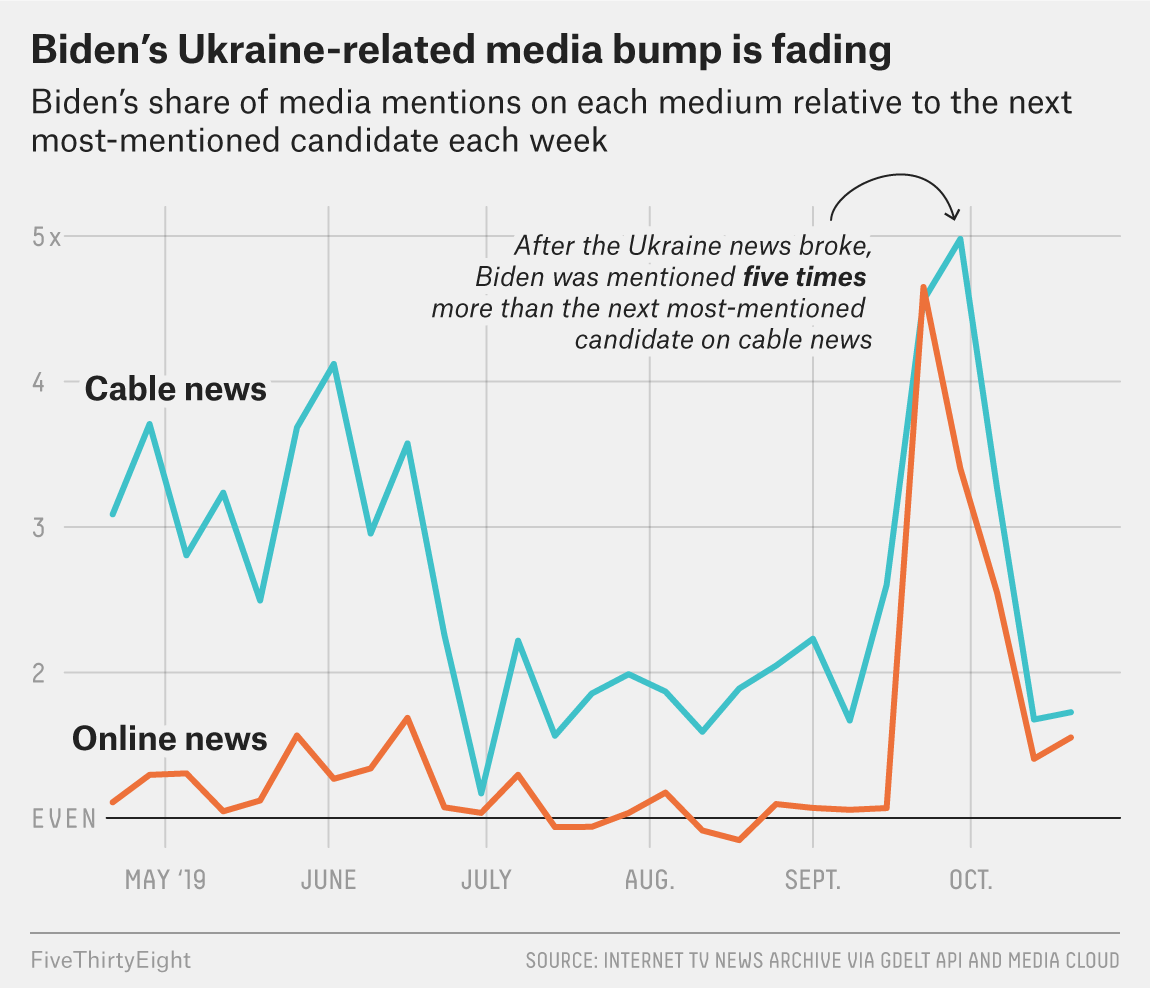

In [ ]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

In [ ]:
# Your Work Here
#isolate the right timeframe
time_slice = df.loc['May 2019':'November 2019']
time_slice

,biden_cable_multiple,biden_online_multiple
date,,
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588
2019-05-26,3.684211,1.566434
2019-06-02,4.120773,1.268581
2019-06-09,2.955257,1.340233
2019-06-16,3.574713,1.687805
2019-06-23,2.258354,1.072789
2019-06-30,1.168615,1.034346


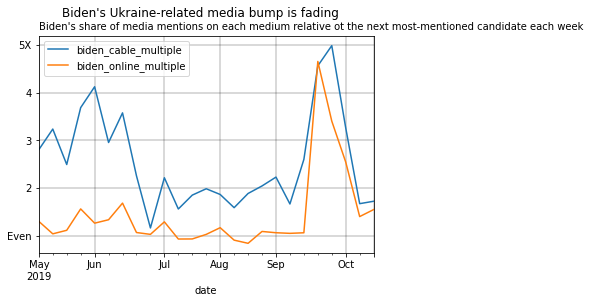

In [ ]:
#line plot with formatting/style
time_slice.plot();
plt.suptitle("Biden's Ukraine-related media bump is fading", fontdict={'fontsize':'16','fontweight':"bold"});
plt.title("Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week", fontdict={'fontsize':'10'}, loc='left');
#set current axes locations
ax = plt.gca()
#custom labels
ax.set_yticklabels(("0", "Even", "2", "3", "4", "5X")) 
ax.set_facecolor('w')
#format the lines
plt.grid(color='black', which='major', linestyle= '-', linewidth=0.3)
plt.style.use('bmh')
plt.show()

In [ ]:
#find style options
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.


In [ ]:
#stretch section 1
slice1 = cell_phones[cell_phones['geo']=='usa']
slice2 = cell_phones[cell_phones['geo']=='chn']
print(slice1)
print(slice2)

      geo  time  cell_phones_total
8861  usa  1960                0.0
8862  usa  1965                0.0
8863  usa  1970                0.0
8864  usa  1975                0.0
8865  usa  1976                0.0
8866  usa  1977                0.0
8867  usa  1978                0.0
8868  usa  1979                0.0
8869  usa  1980                0.0
8870  usa  1984            91600.0
8871  usa  1985           340213.0
8872  usa  1986           681825.0
8873  usa  1987          1230855.0
8874  usa  1988          2069441.0
8875  usa  1989          3508944.0
8876  usa  1990          5283055.0
8877  usa  1991          7557148.0
8878  usa  1992         11032753.0
8879  usa  1993         16009461.0
8880  usa  1994         24134421.0
8881  usa  1995         33785661.0
8882  usa  1996         44042992.0
8883  usa  1997         55312293.0
8884  usa  1998         69209321.0
8885  usa  1999         86047003.0
8886  usa  2000        109478031.0
8887  usa  2001        128500000.0
8888  usa  2002     

In [ ]:
#stretch
china_usa = pd.concat([slice1, slice2])

china_usa.head(25)


,geo,time,cell_phones_total
8861,usa,1960,0.0
8862,usa,1965,0.0
8863,usa,1970,0.0
8864,usa,1975,0.0
8865,usa,1976,0.0
8866,usa,1977,0.0
8867,usa,1978,0.0
8868,usa,1979,0.0
8869,usa,1980,0.0
8870,usa,1984,91600.0


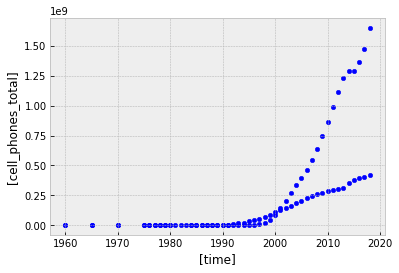

In [ ]:
china_usa.plot(x=['time'], y=['cell_phones_total'], kind='scatter');

Section 2:

We want the intersection of the two dataframes where the common characteristics are maintained; inner join allows us to do that while specifying exactly what we want to keep during the merge

In [ ]:
#Strech Section 3
#Stretch
geo_cell_pop['geo'] = geo_cell_pop['geo'].str.upper()

geo_cell_pop.head()

,geo,time,cell_phones_total,population_total,country,per_person
0,AFG,1960,0.0,8996967,Afghanistan,0.0
1,AFG,1965,0.0,9956318,Afghanistan,0.0
2,AFG,1970,0.0,11173654,Afghanistan,0.0
3,AFG,1975,0.0,12689164,Afghanistan,0.0
4,AFG,1976,0.0,12943093,Afghanistan,0.0


In [ ]:
#Stretch Section 4
